## 6.4 Machine Learning Part 1

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis (Age vs. Book Rating)
#### 4. Regression analysis (Age vs. Book Rating)
#### Bonus (Age vs. Book Rating): performance improvement after removing outliers
#### 5. Data prep for regression analysis (Year of Publication vs. Book Rating)
#### 6. Regression analysis (Year of Publication vs. Book Rating)
#### Bonus (Year of Publication vs. Book Rating): performance improvement after removing outliers

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Import Prepared Data (Path)

path = r'/Users/ladyarmanoid/Documents/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 6/Book Recommendation Analysis/'

# Import data

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'ratings_explicit.pkl'))

### 2. Data cleaning

In [4]:
df.head(20)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,User-ID,Book-Rating,Location,Age,City,Country,Age Group,Rating category,Continent,yearRange
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002.0,Scribner,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
12,0887841740,The Middle Stories,Sheila Heti,2004.0,House of Anansi Press,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
13,1552041778,Jane Doe,R. J. Kaiser,1999.0,Mira Books,8.0,5.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
15,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998.0,Brilliance Audio - Trade,8.0,6.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
16,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,1999.0,Kensington Publishing Corp.,8.0,6.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Middle category,North America,1998-2006
17,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994.0,River City Pub,8.0,7.0,"timmins, ontario, canada",34,timmins,Canada,19-35 years old,Good category,North America,1988-1997
20,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003.0,Hyperion,11400.0,9.0,"ottawa, ontario, canada",49,ottawa,Canada,36-55 years old,Oustanding category,North America,1998-2006
21,0151008116,Life of Pi,Yann Martel,2002.0,Harcourt,11400.0,6.0,"ottawa, ontario, canada",49,ottawa,Canada,36-55 years old,Middle category,North America,1998-2006
23,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA,11400.0,7.0,"ottawa, ontario, canada",49,ottawa,Canada,36-55 years old,Good category,North America,1998-2006


In [5]:
df.shape

(433671, 15)

##### Missing values

In [6]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
User-ID              0
Book-Rating          0
Location             0
Age                  0
City                 0
Country              0
Age Group            0
Rating category      0
Continent            0
yearRange            0
dtype: int64

##### Duplicates check

In [7]:
dups = df.duplicated()

In [8]:
dups.shape # No dups

(433671,)

##### Extreme values checks

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_20305/1370268799.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Book-Rating'], bins = 25) # Shows extreme values
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Book-Rating', ylabel='Density'>

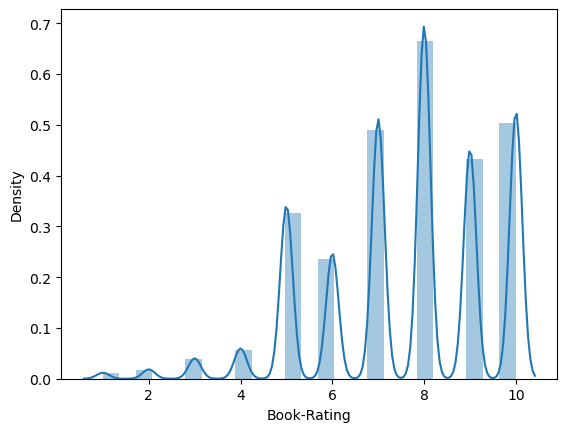

In [9]:
sns.distplot(df['Book-Rating'], bins = 25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [10]:
df['Book-Rating'].mean() # Check the mean

7.601066246071331

In [11]:
df['Book-Rating'].median() # Check the median

8.0

In [12]:
df['Book-Rating'].max() # Check the max

10.0

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_20305/229869899.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins = 25) # Shows extreme values
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Density'>

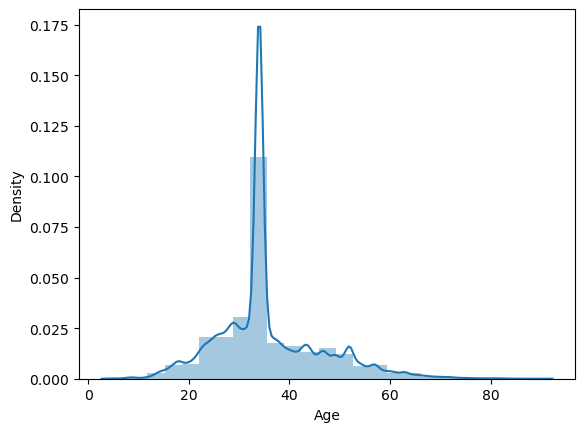

In [13]:
sns.distplot(df['Age'], bins = 25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [14]:
df['Age'].mean() # Check the mean

35.680868676946346

In [15]:
df['Age'].median() # Check the median

34.0

In [16]:
df['Age'].max() # Check the max

90

/var/folders/bx/5gbvgdk148552knvq9wj8vgm0000gn/T/ipykernel_20305/2633295343.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['yearOfPublication'], bins = 25) # Shows extreme values
/Users/ladyarmanoid/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='yearOfPublication', ylabel='Density'>

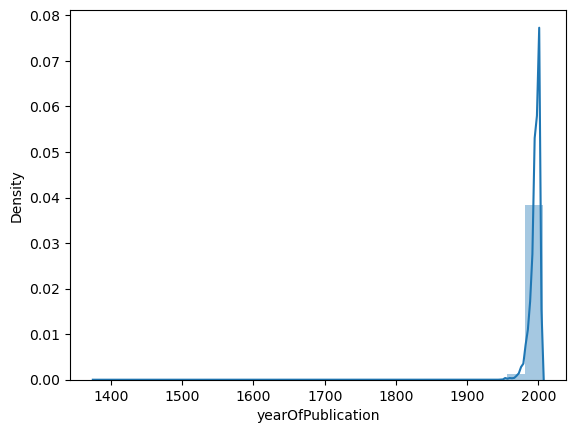

In [17]:
sns.distplot(df['yearOfPublication'], bins = 25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [18]:
df['yearOfPublication'].mean() # Check the mean

1995.71287450625

In [19]:
df['yearOfPublication'].median() # Check the median

1996.0

In [20]:
df['yearOfPublication'].max() # Check the max

2006.0

### 3. Data prep for regression analysis (Age vs. Book Rating)

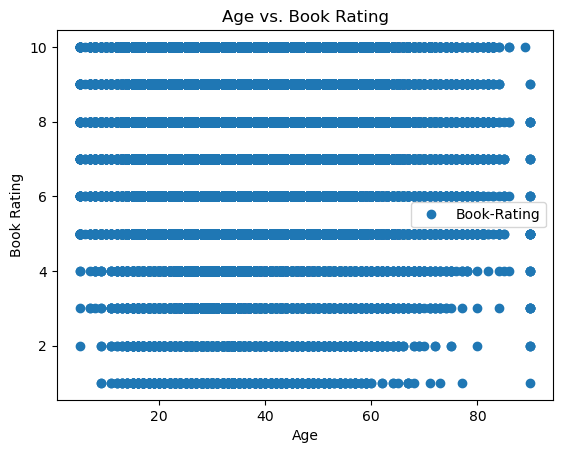

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Age', y = 'Book-Rating',style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Age vs. Book Rating')  
plt.xlabel('Age')  
plt.ylabel('Book Rating')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Age'].values.reshape(-1,1)
y = df['Book-Rating'].values.reshape(-1,1)

In [23]:
X

array([[34],
       [34],
       [34],
       ...,
       [20],
       [34],
       [12]], dtype=int32)

In [24]:
y

array([[5.],
       [5.],
       [5.],
       ...,
       [5.],
       [8.],
       [8.]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis (Age vs. Book Rating)

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

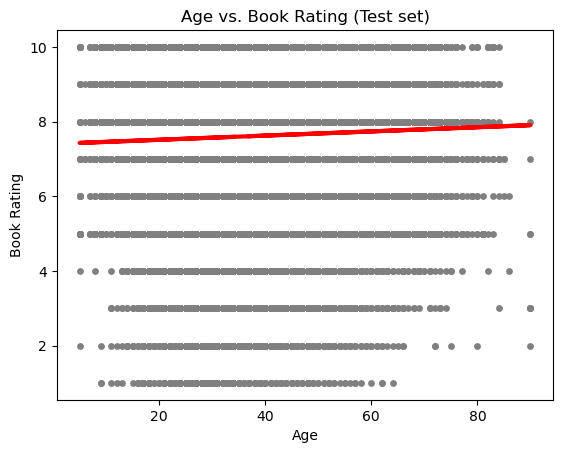

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Age vs. Book Rating (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Book Rating')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0055995]]
Mean squared error:  3.408971999234454
R2 score:  0.0008084848029643599


In [32]:
y_predicted

array([[7.59127046],
       [7.54087498],
       [7.59127046],
       ...,
       [7.59127046],
       [7.59686996],
       [7.60806895]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8.0,7.591270
1,6.0,7.540875
2,10.0,7.591270
3,7.0,7.591270
4,8.0,7.591270
5,4.0,7.596870
6,8.0,7.568872
7,9.0,7.686462
8,7.0,7.652865
9,9.0,7.540875


##### Compare how the regression fits the training set

In [34]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [35]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [36]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.0055995]]
Mean squared error:  3.391062770258277
R2 score:  0.0009757023411072208


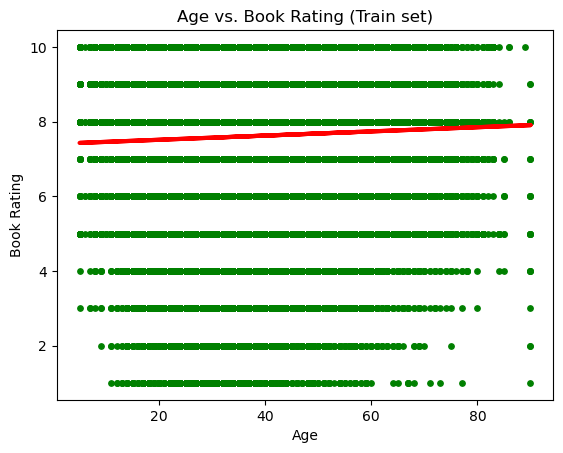

In [37]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Age vs. Book Rating (Train set)')
plot_test.xlabel('Age')
plot_test.ylabel('Book Rating')
plot_test.show()

### *Interpretation for the 'Age' and 'Book Rating' variables*

- Because we have an explicit book rating from 1 to 10, the prediction is showing, most of the time, the median number of 8 for the rating
- As we established in the phase "Exploring Relationship", we can confidently confirm that there are no relationship between the "Age" and the "Book-Rating" variables

### Bonus (Age vs. Book Rating): performance improvement after removing outliers

In [38]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Age'] <= 85]

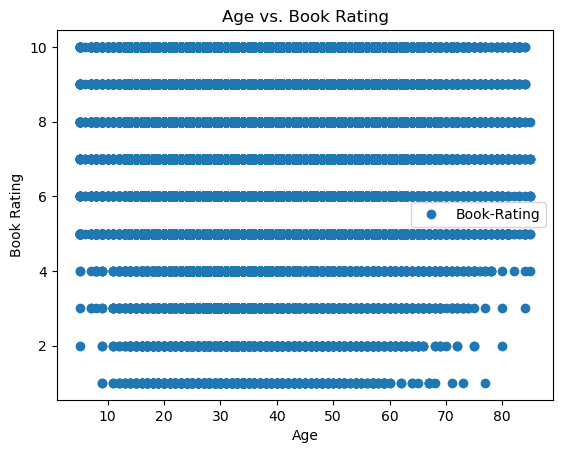

In [39]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Age', y = 'Book-Rating', style = 'o')  
plt.title('Age vs. Book Rating')  
plt.xlabel('Age')  
plt.ylabel('Book Rating')  
plt.show()

In [40]:
# Reshape again.

X_2 = df_test['Age'].values.reshape(-1,1)
y_2 = df_test['Book-Rating'].values.reshape(-1,1)

In [41]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [42]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [43]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [44]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [45]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00585628]]
Mean squared error:  3.3867445747657197
R2 score:  0.0007087548999153981


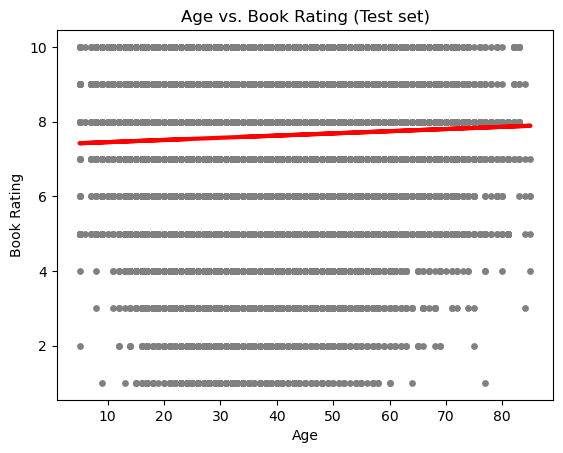

In [46]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Age vs. Book Rating (Test set)')
plot_test.xlabel('Age')
plot_test.ylabel('Book Rating')
plot_test.show()

In [47]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,3.0,7.589941
1,8.0,7.589941
2,8.0,7.589941
3,8.0,7.636792
4,9.0,7.695354
5,10.0,7.589941
6,10.0,7.589941
7,8.0,7.712923
8,10.0,7.584085
9,9.0,7.595798


### 5. Data prep for regression analysis (Year of Publication vs. Book Rating)

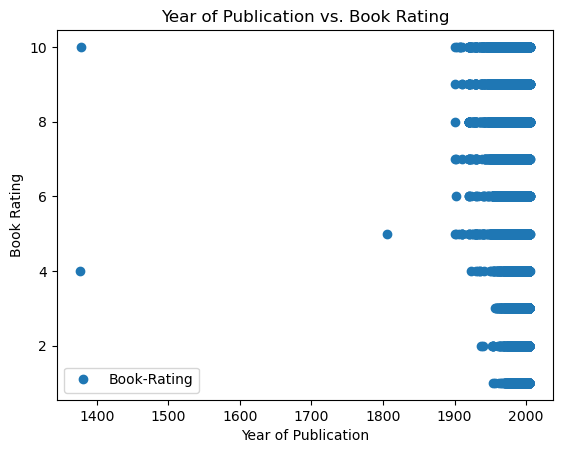

In [48]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'yearOfPublication', y = 'Book-Rating',style = 'o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Year of Publication vs. Book Rating')  
plt.xlabel('Year of Publication')  
plt.ylabel('Book Rating')  
plt.show()

In [49]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['yearOfPublication'].values.reshape(-1,1)
y = df['Book-Rating'].values.reshape(-1,1)

In [50]:
X

array([[2001.],
       [2002.],
       [2004.],
       ...,
       [1996.],
       [1996.],
       [1996.]])

In [51]:
y

array([[5.],
       [5.],
       [5.],
       ...,
       [5.],
       [8.],
       [8.]])

In [52]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis (Year of Publication vs. Book Rating)

In [53]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [54]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

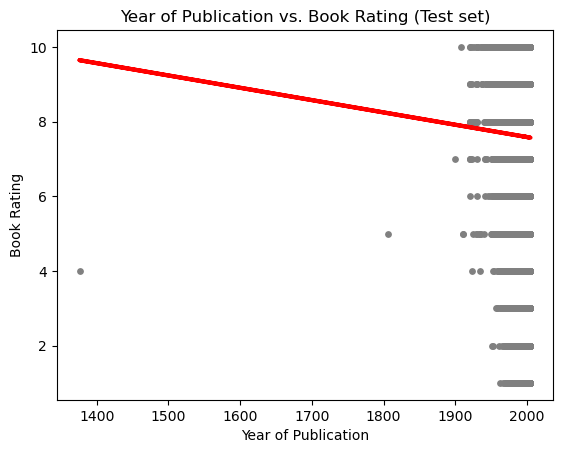

In [56]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year of Publication vs. Book Rating (Test set)')
plot_test.xlabel('Year of Publication')
plot_test.ylabel('Book Rating')
plot_test.show()

In [57]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [58]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00329786]]
Mean squared error:  3.411631597244996
R2 score:  2.8939600901889406e-05


In [59]:
y_predicted

array([[7.59966069],
       [7.58646924],
       [7.58317138],
       ...,
       [7.59966069],
       [7.5732778 ],
       [7.58317138]])

In [60]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,8.0,7.599661
1,6.0,7.586469
2,10.0,7.583171
3,7.0,7.622746
4,8.0,7.596363
5,4.0,7.596363
6,8.0,7.589767
7,9.0,7.589767
8,7.0,7.619448
9,9.0,7.573278


##### Compare how the regression fits the training set

In [61]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [62]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [63]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00329786]]
Mean squared error:  3.39385488675968
R2 score:  0.00015313065318078856


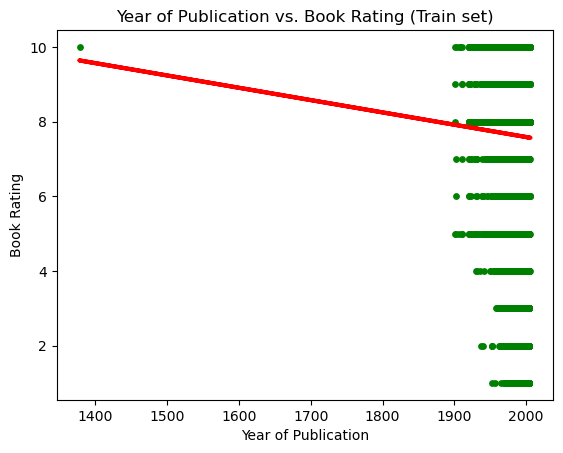

In [64]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year of Publication vs. Book Rating (Train set)')
plot_test.xlabel('Year of Publication')
plot_test.ylabel('Book Rating')
plot_test.show()

### *Interpretation for the 'Year of Publication' and 'Book Rating' variables*

- As we can see in the graph above, we have one published book in the 14th century that is the mail outlier and which achieved the max book rating of 10
- All ratings are attributed to the various books that users have read for books published from the 19th century until the 21st century (last year being 2006)
- There is no correlation between the "Year of Publication" and the "Book-Rating" variables

### Bonus (Year of Publication vs. Book Rating): performance improvement after removing outliers

In [65]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['yearOfPublication'] >= 1900]

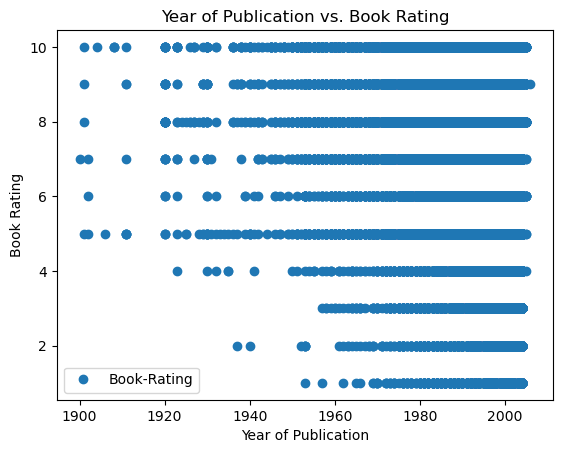

In [66]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'yearOfPublication', y='Book-Rating', style='o')  
plt.title('Year of Publication vs. Book Rating')  
plot_test.xlabel('Year of Publication')
plot_test.ylabel('Book Rating')
plt.show()

In [67]:
# Reshape again.

X_2 = df_test['yearOfPublication'].values.reshape(-1,1)
y_2 = df_test['Book-Rating'].values.reshape(-1,1)

In [68]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [69]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [70]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [71]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00349107]]
Mean squared error:  3.3816708287844555
R2 score:  7.209798293605907e-06


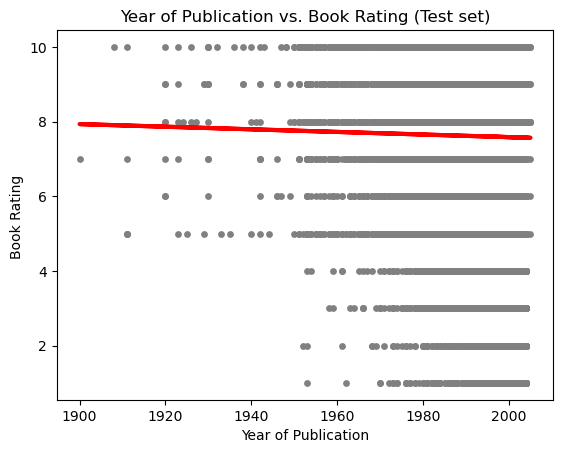

In [73]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Year of Publication vs. Book Rating (Test set)')
plot_test.xlabel('Year of Publication')
plot_test.ylabel('Book Rating ')
plot_test.show()

In [74]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,8.0,7.597560
1,10.0,7.597560
2,10.0,7.580105
3,6.0,7.604542
4,7.0,7.583596
5,7.0,7.597560
6,8.0,7.587087
7,8.0,7.576614
8,7.0,7.667382
9,7.0,7.611525
